<a href="https://colab.research.google.com/github/abdulrahimzulfiqar/Stock-Price-Prediction-Using-Scikit-Learn-Linear-Regression/blob/main/Stock_Price_Prediction_Using_Scikit_Learn_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Using Scikit-Learn Linear Regression / Time Series Forecasting**

**Setup**

In [13]:
#Setting up yfinance to import dataset of stock prices
!pip install yfinance matplotlib --quiet

**Imports**

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**Load & Check Data**

In [15]:
# Download stock data
df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df = df[['Close']]  # Only use closing prices

print("✅ Data loaded successfully:", df.shape)
df.head()

/tmp/ipython-input-15-314838003.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

✅ Data loaded successfully: (1006, 1)


Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620842
2020-01-03,71.914833
2020-01-06,72.487854
2020-01-07,72.146927
2020-01-08,73.307518


**Create Lag Features**

In [16]:
N = 5  # Number of previous days used for prediction

for i in range(1, N+1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)
print("✅ Feature matrix created:", df.shape)
df.head()

✅ Feature matrix created: (1001, 6)


Price,Close,lag_1,lag_2,lag_3,lag_4,lag_5
Ticker,AAPL,,,,,
Date,,,,,,
2020-01-09,74.864616,73.307518,72.146927,72.487854,71.914833,72.620842
2020-01-10,75.033867,74.864616,73.307518,72.146927,72.487854,71.914833
2020-01-13,76.636909,75.033867,74.864616,73.307518,72.146927,72.487854
2020-01-14,75.602058,76.636909,75.033867,74.864616,73.307518,72.146927
2020-01-15,75.278091,75.602058,76.636909,75.033867,74.864616,73.307518


**Split Data**

In [17]:
X = df[[f'lag_{i}' for i in range(1, N+1)]].values
y = df['Close'].values
# Check for multicollinearity
# High correlation (close to 1.0) between lag features indicates multicollinearity.
# This is expected in stock price time series, as today's price is usually close to previous days.

corr_matrix = pd.DataFrame(X, columns=[f'lag_{i}' for i in range(1, N+1)]).corr()
print("🔍 Correlation matrix for multicollinearity check:\n", corr_matrix)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

print("✅ Data split:", X_train.shape, X_test.shape)

🔍 Correlation matrix for multicollinearity check:
           lag_1     lag_2     lag_3     lag_4     lag_5
lag_1  1.000000  0.996939  0.994134  0.991475  0.988898
lag_2  0.996939  1.000000  0.996943  0.994143  0.991486
lag_3  0.994134  0.996943  1.000000  0.996947  0.994150
lag_4  0.991475  0.994143  0.996947  1.000000  0.996951
lag_5  0.988898  0.991486  0.994150  0.996951  1.000000
✅ Data split: (800, 5) (201, 5)


**Feature Scaling**

In [18]:
#Features (stock prices) may have large magnitude and affect gradient descent so we scale:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling done. Sample input:\n", X_train_scaled[:2])


✅ Scaling done. Sample input:
 [[-1.87663385 -1.90881192 -1.89037426 -1.90266071 -1.87219337]
 [-1.82398999 -1.86965197 -1.90185455 -1.88340312 -1.89587676]]


**Train with Sklearn**

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("✅ Model trained.")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

✅ Model trained.
MSE: 4.499273591685593
R²: 0.9619352819311116


**Visualize Prediction**

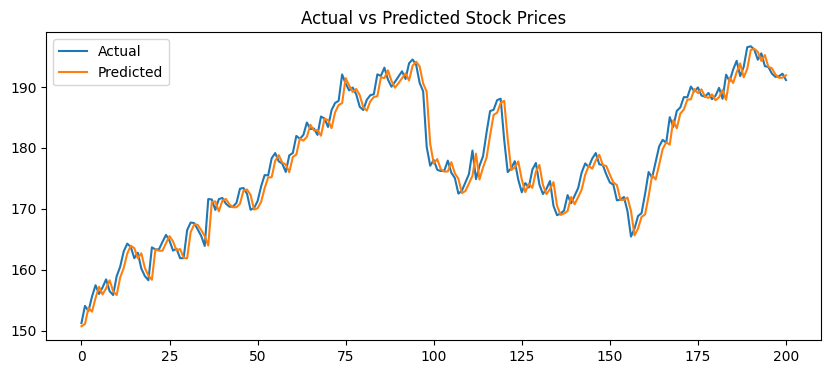

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()